In [1]:
# UCI Machine Learning Repository - http://archive.ics.uci.edu/ml/datasets.html

# banking.csv
# banking-batch.csv

# Example showing how to use sklearn to make some simple ML, nothing more than that.  
# Always remember to check your data first, look for corelations, try to understand how data is clustered, 
# maybe using simple statistical tools you can get what you want. 
# If you need ML/DL start with a quick implementation and see how you can improve from that.
# 


In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# file that contains the historical data for customers who have purchased products 
name1 = '/Users/tpalczewski/Downloads/banking.csv' # 

# potential customers
name2 = '/Users/tpalczewski/Downloads/banking-batch.csv'

csvfile1 = open(name1, 'rb')
csvfile2 = open(name2, 'rb')

reader1 = csv.DictReader(csvfile1)
reader2 = csv.DictReader(csvfile2)

i = 0
for row in reader1:
    if i == 9 or i ==10 or i == 11:
        print row # just three examples to have a feeling; first row is a header
    i += 1
print("Number of all customers in the csvfile1 = " + str(i))

/Users/tpalczewski/Library/Python/2.7/lib/python/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


{'y': '0', 'cons_price_idx': '93.075', 'poutcome': 'failure', 'emp_var_rate': '-1.8', 'campaign': '2', 'default': 'no', 'age': '27', 'day_of_week': 'thu', 'marital': 'single', 'nr_employed': '5099.1', 'job': 'blue-collar', 'contact': 'cellular', 'euribor3m': '1.41', 'month': 'apr', 'duration': '191', 'cons_conf_idx': '-47.1', 'loan': 'no', 'education': 'basic.4y', 'pdays': '999', 'housing': 'yes', 'previous': '1'}
{'y': '0', 'cons_price_idx': '93.994', 'poutcome': 'nonexistent', 'emp_var_rate': '1.1', 'campaign': '2', 'default': 'no', 'age': '34', 'day_of_week': 'fri', 'marital': 'single', 'nr_employed': '5191', 'job': 'housemaid', 'contact': 'telephone', 'euribor3m': '4.864', 'month': 'may', 'duration': '62', 'cons_conf_idx': '-36.4', 'loan': 'no', 'education': 'university.degree', 'pdays': '999', 'housing': 'no', 'previous': '0'}
{'y': '0', 'cons_price_idx': '93.444', 'poutcome': 'nonexistent', 'emp_var_rate': '1.4', 'campaign': '1', 'default': 'no', 'age': '41', 'day_of_week': 'thu'

In [3]:
# Input variables:
# bank client data:
# 1 - age (numeric)
# 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
# 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
# 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
# 5 - default: has credit in default? (categorical: 'no','yes','unknown')
# 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
# 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
# 8 - contact: contact communication type (categorical: 'cellular','telephone') 
# 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
# 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
# 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
# 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
# 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
# 14 - previous: number of contacts performed before this campaign and for this client (numeric)
# 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
# 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
# 17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
# 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
# 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
# 20 - nr.employed: number of employees - quarterly indicator (numeric)

# Output variable (desired target):
# 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [4]:
i = 0
for row in reader2:
    if i == 9:
        print row
    i += 1
print("Number of all customers in the csvfile2 = " + str(i))

{'cons_price_idx': '93.994', 'poutcome': 'nonexistent', 'emp_var_rate': '1.1', 'campaign': '1', 'default': 'unknown', 'age': '35', 'day_of_week': 'thu', 'marital': 'married', 'nr_employed': '5191', 'job': 'blue-collar', 'contact': 'telephone', 'euribor3m': '4.855', 'month': 'may', 'duration': '170', 'cons_conf_idx': '-36.4', 'loan': 'no', 'education': 'basic.9y', 'pdays': '999', 'housing': 'no', 'previous': '0'}
Number of all customers in the csvfile2 = 4119


In [5]:
# ['age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y']

In [6]:
# lists
age = []
job = []
marital = []
education = []
default = []
housing = []
loan = []
contact = []
month = []
day_of_week = []
duration = []
campaign = []
pdays = []
previous = []
poutcome = []
emp_var_rate = []
cons_price_idx = []
cons_conf_idx = []
euribor3m = []
nr_employed = []
y = []  # we are assuming that this is our label; is or not a good candidate to make a special offer for her/him, ... 

flag = [] # if == 1 from file that contains the historical data for customers who have purchased products; 0 - potential clients

# counters
count_all = 0

In [7]:
i = 0
with open(name1, 'rb') as csvfile:
    reader1 = csv.DictReader(csvfile)
    for row in reader1:
        #
        #
        age.append(row['age'])
        job.append(row['job'])
        marital.append(row['marital'])
        education.append(row['education'])
        default.append(row['default'])
        housing.append(row['housing'])
        loan.append(row['loan'])
        contact.append(row['contact'])
        month.append(row['month'])
        day_of_week.append(row['day_of_week'])
        duration.append(row['duration'])
        campaign.append(row['campaign'])
        pdays.append(row['pdays'])
        previous.append(row['previous'])
        poutcome.append(row['poutcome'])
        emp_var_rate.append(row['emp_var_rate'])
        cons_price_idx.append(row['cons_price_idx'])
        cons_conf_idx.append(row['cons_conf_idx'])
        euribor3m.append(row['euribor3m'])
        nr_employed.append(row['nr_employed'])
        y.append(row['y'])
        flag.append(1)
        count_all += 1
        i += 1

In [8]:
# We have some data, now I would explore all the features/variables 
# do necessary cleaning 
# If needed do some data enginearing 
# but in this basic example I'm skipping these crucial parts


# So let's make a classifier - to see if we can figure out which potential costomers 
# BDT, SVM, random forest 

In [9]:
import sklearn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.svm import SVR

# Import function to create training and test set splits
from sklearn.cross_validation import train_test_split

In [10]:
# Import function to automatically create polynomial features!
from sklearn.preprocessing import PolynomialFeatures

# Import Linear Regression and a regularized regression function
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV

In [11]:
#----- PIPELINE

from sklearn.pipeline import make_pipeline

In [12]:
# BDT
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
# PANDAS    --- Scikit learn plays really well with Pandas
import pandas as pd

In [14]:
# Now we engenired some features, and we have precisly defined problem, for example make classifier 
# to select good customers
# for this simple example let's say that we know that important features are
# cons_price_idx
# campaign
# pdays
# euribor3m

In [15]:
dataFrame_y = pd.DataFrame({
    'y': y})

In [16]:
dataFrame_features = pd.DataFrame({
    'x1': cons_price_idx,
    'x2': campaign,
    'x3': pdays,
    'x4': euribor3m,
    })

In [17]:
dataFrame_all = pd.DataFrame({
    'x1': cons_price_idx,
    'x2': campaign,
    'x3': pdays,
    'x4': euribor3m,
    'y':y
    })

In [18]:
# Split the data into training/testing sets 
# In general it is adviced to split to the train, test, and cross-validation sets
X_train, X_test, y_train, y_test = train_test_split(dataFrame_features, y, test_size=0.4, random_state=42)
#print(X_train)
#print(y_train)

In [19]:
# So we have some data frames with four features and label y 
# Now we can train some models and evaluate them

In [20]:
# BDT - Ada Boost Classifier - DecisionTreeClassifier

In [21]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                         algorithm="SAMME.R",
                         n_estimators=5000)
bdt.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=5000, random_state=None)

In [22]:
# so I doesn't work :) probably randomly selected feature are not the best for this task :) 

In [23]:
train_score = bdt.score(X_train, y_train)
print("Train Score = " + str(train_score) )

Train Score = 0.921900291356


In [24]:
predictions_train = bdt.predict(X_train)

In [25]:
print(accuracy_score(y_train, predictions_train))
print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

0.921900291356
[[21713   249]
 [ 1681  1069]]
             precision    recall  f1-score   support

          0       0.93      0.99      0.96     21962
          1       0.81      0.39      0.53      2750

avg / total       0.92      0.92      0.91     24712



In [26]:
test_score = bdt.score(X_test, y_test)
print("Test Score = " + str(test_score))

Test Score = 0.889536295217


In [27]:
predictions = bdt.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.889536295217
[[14131   455]
 [ 1365   525]]
             precision    recall  f1-score   support

          0       0.91      0.97      0.94     14586
          1       0.54      0.28      0.37      1890

avg / total       0.87      0.89      0.87     16476



In [28]:
# kNN classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)

In [31]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [32]:
predictions = knn.predict(X_train)

In [33]:
print(accuracy_score(y_train, predictions))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

0.898834574296
[[21111   851]
 [ 1649  1101]]
             precision    recall  f1-score   support

          0       0.93      0.96      0.94     21962
          1       0.56      0.40      0.47      2750

avg / total       0.89      0.90      0.89     24712



In [34]:
train_score = knn.score(X_train, y_train)
print("Train Score = " + str(train_score) )

Train Score = 0.898834574296


In [35]:
# BDT train score = 0.889839766934
# kNN train score = 0.898834574296

In [36]:
# ROC curve

In [37]:
from sklearn import metrics

In [38]:
predictions_test = knn.score(X_test, y_test)

In [39]:
y_pred_class = knn.predict(X_test)

In [43]:
y_test = np.array(y_test.astype(int))
y_pred_class = np.array(y_pred_class.astype(int))

print(y_pred_class)
print(y_test)

[0 0 0 ..., 0 0 0]
[0 1 1 ..., 0 0 0]


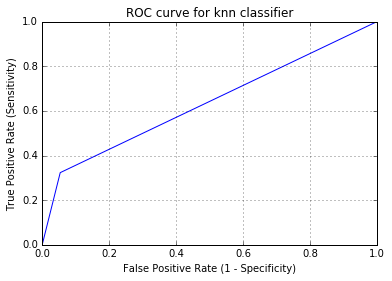

In [44]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for knn classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [45]:
# SVM classifier 

In [46]:
from sklearn.svm import SVC

In [47]:
svm = SVC()

In [48]:
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
predictions = svm.predict(X_train)

In [50]:
print(accuracy_score(y_train, predictions))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

0.901141146002
[[21733   229]
 [ 2214   536]]
             precision    recall  f1-score   support

          0       0.91      0.99      0.95     21962
          1       0.70      0.19      0.30      2750

avg / total       0.88      0.90      0.88     24712



In [51]:
train_score = svm.score(X_train, y_train)
print("Train Score = " + str(train_score) )

Train Score = 0.901141146002


In [52]:
# BDT train score = 0.889839766934
# kNN train score = 0.898834574296
# SVM classifier train score = 0.901141146002

In [54]:
predictions_test = svm.score(X_test, y_test)

In [55]:
y_pred_class = svm.predict(X_test)

In [56]:
y_test = np.array(y_test.astype(int))
y_pred_class = np.array(y_pred_class.astype(int))

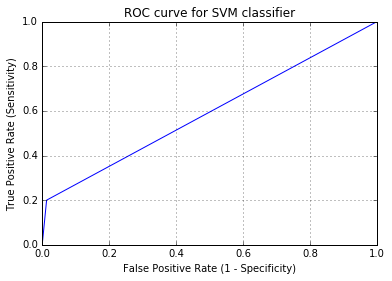

In [57]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for SVM classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [58]:
# Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfc = RandomForestClassifier(n_estimators=10)

In [61]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
predictions = rfc.predict(X_train)

In [63]:
print(accuracy_score(y_train, predictions))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

0.920160246034
[[21671   291]
 [ 1682  1068]]
             precision    recall  f1-score   support

          0       0.93      0.99      0.96     21962
          1       0.79      0.39      0.52      2750

avg / total       0.91      0.92      0.91     24712



In [64]:
train_score = rfc.score(X_train, y_train)
print("Train Score = " + str(train_score) )

Train Score = 0.920160246034


In [65]:
# BDT train score = 0.889839766934
# kNN train score = 0.898834574296
# SVM classifier train score = 0.901141146002
# Random Forest classifier train score = 0.920160246034

In [66]:
predictions_test = rfc.score(X_test, y_test)

In [67]:
y_pred_class = rfc.predict(X_test)

In [68]:
y_test = np.array(y_test.astype(int))
y_pred_class = np.array(y_pred_class.astype(int))

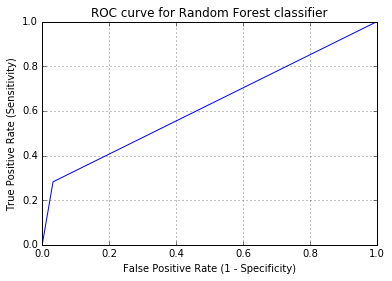

In [69]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Random Forest classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()